# Data science explorer - project 001 Boston Housing

In [18]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 1. Quick look of the data

In [2]:
dt_1 = pd.read_csv('train.csv')
print("Print first 5 subjects")
print(dt_1.head())
print("")
print("Basic descriptive statistics for all features")
print(dt_1.describe())
print("")
print("Feaure attributes")
print(dt_1.info())

Print first 5 subjects
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  7.52601   0.0  18.10     0  0.713  6.417  98.3  2.1850   24  666     20.2   
1  0.01360  75.0   4.00     0  0.410  5.888  47.6  7.3197    3  469     21.1   
2  0.05789  12.5   6.07     0  0.409  5.878  21.4  6.4980    4  345     18.9   
3  0.05646   0.0  12.83     0  0.437  6.232  53.7  5.0141    5  398     18.7   
4  2.14918   0.0  19.58     0  0.871  5.709  98.5  1.6232    5  403     14.7   

        B  LSTAT  MEDV  
0  304.21  19.31  13.0  
1  396.90  14.80  18.9  
2  396.21   8.10  22.0  
3  386.40  12.34  21.2  
4  261.95  15.79  19.4  

Basic descriptive statistics for all features
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  406.000000  406.000000  406.000000  406.000000  406.000000  406.000000   
mean     3.827366   11.623153   11.316305    0.076355    0.557776    6.249941   
std      9.109085   24.402026    6.863974    0.265892   

#### There is no variable with missing value. No need to do the imputation.


#### Brief explanation of each variable. Let's make guessing before look into the correlation plot. 
1. CRIM - per capita crime rate by town *Negative*
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft. *Positive*
3. INDUS - proportion of non-retail business acres per town. *Negative*
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) *Positive?*
5. NOX - nitric oxides concentration (parts per 10 million) *Negative?*
6. RM - average number of rooms per dwelling *Positive*
7. AGE - proportion of owner-occupied units built prior to 1940 *Negative?*
8. DIS - weighted distances to five Boston employment centres *Negative (wrong)*
9. RAD - index of accessibility to radial highways *Positive (wrong)*
10. TAX - full-value property-tax rate per (dollar) 10,000 *Positive (wrong)*
11. PTRATIO - pupil-teacher ratio by town *Positive (wrong) => high ratio means less teacher in the area*
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town *Negative (wrong)*
13. LSTAT - % lower status of the population *Negative*
14. MEDV - Median value of owner-occupied homes in (dollar) 1000's

#### present the distribution of variables

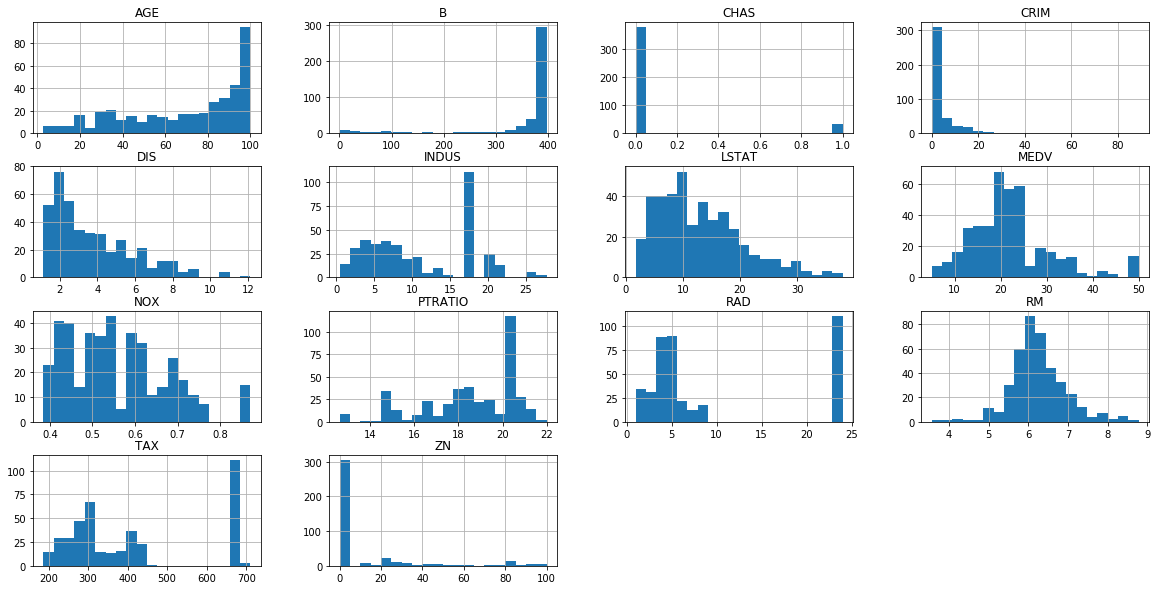

In [24]:
dt_1.hist(bins=20, figsize=(20, 10))
plt.show()

In [4]:
corr = dt_1.corr()
#print(corr)

In [5]:
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.196897,0.399185,-0.059202,0.397948,-0.200893,0.348213,-0.370882,0.610504,0.572916,0.287078,-0.368653,0.437323,-0.391996
ZN,-0.196897,1,-0.543051,-0.0572036,-0.526843,0.333092,-0.589581,0.678274,-0.315335,-0.314941,-0.379173,0.173803,-0.424928,0.391692
INDUS,0.399185,-0.543051,1,0.0756734,0.773629,-0.373027,0.656003,-0.724867,0.599587,0.714887,0.375716,-0.349914,0.600455,-0.480761
CHAS,-0.059202,-0.0572036,0.0756734,1,0.104681,0.0993481,0.107381,-0.115743,-0.0145926,-0.0369351,-0.14822,0.043963,-0.0599479,0.196543
NOX,0.397948,-0.526843,0.773629,0.104681,1,-0.299267,0.732965,-0.769411,0.587166,0.650794,0.163882,-0.361469,0.575349,-0.438394
RM,-0.200893,0.333092,-0.373027,0.0993481,-0.299267,1,-0.246372,0.224844,-0.191998,-0.271411,-0.332315,0.131016,-0.604978,0.655535
AGE,0.348213,-0.589581,0.656003,0.107381,0.732965,-0.246372,1,-0.754753,0.44902,0.496725,0.244861,-0.264377,0.597017,-0.391559
DIS,-0.370882,0.678274,-0.724867,-0.115743,-0.769411,0.224844,-0.754753,1,-0.493284,-0.533909,-0.236239,0.292426,-0.501834,0.28203
RAD,0.610504,-0.315335,0.599587,-0.0145926,0.587166,-0.191998,0.44902,-0.493284,1,0.919968,0.472658,-0.423024,0.470005,-0.388223
TAX,0.572916,-0.314941,0.714887,-0.0369351,0.650794,-0.271411,0.496725,-0.533909,0.919968,1,0.465029,-0.425931,0.522692,-0.466841


In [6]:
abs_corr = np.abs(corr['MEDV'])
print(abs_corr.sort_values(ascending=False).head(7))

MEDV       1.000000
LSTAT      0.738452
RM         0.655535
PTRATIO    0.488037
INDUS      0.480761
TAX        0.466841
NOX        0.438394
Name: MEDV, dtype: float64


# 2. Construct model

2.1 From the sklearn cheat sheet, try LASSO first

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#define model
Llm = linear_model.Lasso(alpha = 0.1)

In [8]:
y = dt_1['MEDV']
X = dt_1.iloc[:, 0:13]

#Spllit the 406 data into 80% training, 20% testing
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
Llm.fit(train_X, train_y)
prdt = Llm.predict(val_X)

In [10]:
#check the coefficient
#print(Llm.coef_)
X_corr = abs_corr.iloc[0:13]
coeff = pd.DataFrame(Llm.coef_)
#pd.concat([X_corr, coeff], axis=1)
print(coeff)

           0
0  -0.097121
1   0.070456
2  -0.001160
3   1.401871
4  -0.000000
5   2.495521
6  -0.010525
7  -1.013113
8   0.274593
9  -0.016209
10 -0.720117
11  0.007336
12 -0.554768


In [11]:
#apply mean absolute error and mean squared error to evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error:")
print(mean_absolute_error(prdt, val_y))
print("Mean squared error:")
print(mean_squared_error(prdt, val_y))

Mean absolute error:
3.5131298719761244
Mean squared error:
27.50227005443564


2.2 Since it's a relatively small dataset, try cross-validation Lasso

In [12]:
from sklearn.linear_model import LassoCV
#define model
Lcvlm = LassoCV(cv=5, random_state=0)
CVreg = Lcvlm.fit(X, y)
prdt_cv = Lcvlm.predict(val_X)

print("Lasso CV Mean absolute error:")
print(mean_absolute_error(prdt_cv, val_y))
print("Lasso CV Mean squared error:")
print(mean_squared_error(prdt_cv, val_y))

Lasso CV Mean absolute error:
3.714613821604252
Lasso CV Mean squared error:
30.09105362678914


2.3 Decision Tree and Random Forest are also good for regression, try both of them

In [17]:
from sklearn.ensemble import RandomForestRegressor
#define model
RFmod = RandomForestRegressor(n_estimators=10, min_samples_split=5, random_state=101)
RFmod.fit(train_X, train_y)
RFprdt = RFmod.predict(val_X)

print("Random Forest Mean absolute error:")
print(mean_absolute_error(RFprdt, val_y))
print("Random Forest Mean squared error:")
print(mean_squared_error(RFprdt, val_y))

Random Forest Mean absolute error:
2.8696061177981904
Random Forest Mean squared error:
19.448139044610322


# 3. Generate the result for competition w/ cross-validation Lasso

In [14]:
exam_test = pd.read_csv('test.csv')
result_Lcv = Lcvlm.predict(exam_test.iloc[:, 1:])
#print(result_Lcv)

result_Lcv_submit = pd.DataFrame({"ID": exam_test['ID'], "MEDV":result_Lcv})
print(result_Lcv_submit.head())

pd.DataFrame(result_Lcv_submit).to_csv("submit_SJ.csv", index=False)